In [1]:
!pip install SpeechRecognition pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.3 MB/s 


In [2]:
pip install youtube_dl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 6.4 MB/s 


In [3]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [4]:
from __future__ import unicode_literals
import youtube_dl

import sys
if sys.version_info[0] >= 3:
    unicode = str

ydl_opts = {
                'format': 'bestaudio',
                'outtmpl': unicode('/content/%(title)s-%(id)s.'),
                'postprocessors': [{
                                    'key': 'FFmpegExtractAudio',
                                    'preferredcodec': 'wav',
                                    'preferredquality': '192'
                                }],
                'restrictfilenames':True,
                'forcefilename':True,
            } 

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
                info = ydl.extract_info('https://www.youtube.com/watch?v=qhspIpGMaX4', download=True)
                filename = ydl.prepare_filename(info)

[youtube] qhspIpGMaX4: Downloading webpage
[youtube] qhspIpGMaX4: Downloading player a97e97de
/content/FOMC_Press_Conference_Call_March_15_2020-qhspIpGMaX4.
[download] Destination: /content/FOMC_Press_Conference_Call_March_15_2020-qhspIpGMaX4.
[download] 100% of 39.15MiB in 08:34
[ffmpeg] Correcting container in "/content/FOMC_Press_Conference_Call_March_15_2020-qhspIpGMaX4."
[ffmpeg] Destination: /content/FOMC_Press_Conference_Call_March_15_2020-qhspIpGMaX4.wav
Deleting original file /content/FOMC_Press_Conference_Call_March_15_2020-qhspIpGMaX4. (pass -k to keep)


In [5]:
filename

'/content/FOMC_Press_Conference_Call_March_15_2020-qhspIpGMaX4.'

In [6]:
import speech_recognition as sr

In [7]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence
from tqdm import tqdm
import pandas as pd

df_text_input = []


# create a speech recognition object
r = sr.Recognizer()

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in tqdm(enumerate(chunks, start=1)):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                df_text_input.append(text)
                whole_text += text
    # return the text for all chunks detected
    return whole_text

In [8]:
path = filename+"wav"

In [9]:
kl = get_large_audio_transcription(path)

1it [00:00,  2.25it/s]

audio-chunks/chunk1.wav : Evening everyone. 


2it [00:01,  1.22it/s]

audio-chunks/chunk2.wav : The federal reserve took a number of actions to support american families and business and the economy overall. 


3it [00:02,  1.17it/s]

audio-chunks/chunk3.wav : And promote the flow credit as we weather disruptions caused by the coronavirus. 


4it [00:03,  1.18it/s]

audio-chunks/chunk4.wav : Virus is having a profound effect on people across the united states and around the world. 


5it [00:04,  1.12it/s]

audio-chunks/chunk5.wav : I'll be half of my colleagues at the federal reserve our first concern is for those who've been harmed. 


6it [00:05,  1.00it/s]

audio-chunks/chunk6.wav : Family's businesses schools organizations and governments at all levels are taking steps to protect people's help. 


7it [00:06,  1.04s/it]

audio-chunks/chunk7.wav : These measures which are essential for containing the outbreak will nonetheless understandably take a toll on you can annika activity in the near-term. 


8it [00:07,  1.03s/it]

audio-chunks/chunk8.wav : Well the primary response to this challenge will come from our healthcare providers and policy experts. 


9it [00:08,  1.14it/s]

audio-chunks/chunk9.wav : Economic policymakers must. 


10it [00:08,  1.14it/s]

audio-chunks/chunk10.wav : Do what we can to ease hardship caused by the disruptions to the economy. 


11it [00:09,  1.13it/s]

audio-chunks/chunk11.wav : And to support us with return to normal once they've passed. 


12it [00:11,  1.02it/s]

audio-chunks/chunk12.wav : Is guided by our mandate from congress to promote maximum employment and stable prices for the american people. 


13it [00:11,  1.10it/s]

audio-chunks/chunk13.wav : Along with our responsibilities to promote the stability of the financial system. 


14it [00:12,  1.10it/s]

audio-chunks/chunk14.wav : Today we reduce the target range for our policy interest rate by one percentage point. 


15it [00:13,  1.26it/s]

audio-chunks/chunk15.wav : Bringing it close to zero. 


16it [00:13,  1.34it/s]

audio-chunks/chunk16.wav : And said that we expect to maintain the right at this level. 


17it [00:14,  1.40it/s]

audio-chunks/chunk17.wav : Until we're confident that the economy has weathered recent events. 


18it [00:15,  1.38it/s]

audio-chunks/chunk18.wav : And is on track to achieve our maximum employment and price stability goals. 


19it [00:16,  1.25it/s]

audio-chunks/chunk19.wav : Addition we took other actions to support the flow of credit to households and businesses. 


20it [00:16,  1.49it/s]

Error: 


21it [00:16,  1.76it/s]

Error: 


22it [00:18,  1.39it/s]

audio-chunks/chunk22.wav : Before describing our actions more fully i will share how my colleagues and i currently view the economic outlook. 


23it [00:18,  1.66it/s]

Error: 


24it [00:18,  1.92it/s]

Error: 


25it [00:20,  1.17it/s]

audio-chunks/chunk25.wav : Economy came into this challenging. on a strong footing the unemployment rate was 3.5% in february and has been at or near half-century lows for almost 2 years. 


26it [00:21,  1.04it/s]

audio-chunks/chunk26.wav : Job gains have been running at a solid pace well above what is needed to provide jobs for new entrants into the labor market. 


27it [00:22,  1.03s/it]

audio-chunks/chunk27.wav : Participation in the labor force by people in their prime working years remained near its highest rate in more than a decade. 


28it [00:23,  1.07it/s]

audio-chunks/chunk28.wav : And wages have been rising particularly for lower-paying jobs. 


29it [00:24,  1.17it/s]

audio-chunks/chunk29.wav : Economic activity has been expanding at a moderate rate. 


30it [00:25,  1.15it/s]

audio-chunks/chunk30.wav : Even though weak growth abroad and trade developments have been weighing on some sectors. 


31it [00:25,  1.32it/s]

audio-chunks/chunk31.wav : U.s. banks are strong. 


32it [00:26,  1.25it/s]

audio-chunks/chunk32.wav : Have high levels of capital and liquidity and are well positioned to provide credit to households and businesses. 


33it [00:26,  1.41it/s]

Error: 


34it [00:27,  1.47it/s]

audio-chunks/chunk34.wav : Against this favorable backdrop. 


35it [00:28,  1.46it/s]

audio-chunks/chunk35.wav : The virus present significant economic challenges. 


36it [00:29,  1.26it/s]

audio-chunks/chunk36.wav : Like others we expected the illness and the measures now being put in place to stem it spread. 


37it [00:30,  1.24it/s]

audio-chunks/chunk37.wav : Will have a significant effect on economic activity in the near-term. 


38it [00:30,  1.30it/s]

audio-chunks/chunk38.wav : Who's in travel tourism and hospitality. 


39it [00:31,  1.36it/s]

audio-chunks/chunk39.wav : Are already seeing a sharp drop in business. 


40it [00:32,  1.20it/s]

audio-chunks/chunk40.wav : In addition the effects of the outbreak or restraining economic activity in many foreign economies. 


41it [00:33,  1.18it/s]

audio-chunks/chunk41.wav : Which is causing difficulties for us industries that rely on global supply chains. 


42it [00:34,  1.15it/s]

audio-chunks/chunk42.wav : And we will also weigh on our exports for a time. 


43it [00:34,  1.26it/s]

audio-chunks/chunk43.wav : Moreover the energy sector has recently come under stress. 


44it [00:35,  1.35it/s]

audio-chunks/chunk44.wav : Because of the large drop in global oil prices. 


45it [00:36,  1.28it/s]

audio-chunks/chunk45.wav : Inflation which has continued to run below are symmetric 2% of ejected. 


46it [00:37,  1.35it/s]

audio-chunks/chunk46.wav : Will likely be held down this year by the effects of the outbreak. 


47it [00:37,  1.62it/s]

Error: 


48it [00:38,  1.59it/s]

audio-chunks/chunk48.wav : Conditions have also tightened markedly. 


49it [00:38,  1.51it/s]

audio-chunks/chunk49.wav : The cost of credit has risen for all but the strongest borrowers. 


50it [00:39,  1.54it/s]

audio-chunks/chunk50.wav : Stock markets around the world are down sharply. 


51it [00:40,  1.39it/s]

audio-chunks/chunk51.wav : The rapidly evolving situation has led to high volatility in financial markets. 


52it [00:40,  1.43it/s]

audio-chunks/chunk52.wav : As everyone tries to assess the path ahead. 


53it [00:41,  1.29it/s]

audio-chunks/chunk53.wav : In the past week several important financial markets including the market for u.s. treasury securities. 


54it [00:42,  1.28it/s]

audio-chunks/chunk54.wav : Habit times showing signs of stress and a liquidity. 


55it [00:43,  1.23it/s]

audio-chunks/chunk55.wav : The market for treasury securities is a critical part of the foundation of the global financial system. 


56it [00:44,  1.32it/s]

audio-chunks/chunk56.wav : It is generally the most liquid of all mark. 


57it [00:44,  1.36it/s]

audio-chunks/chunk57.wav : And serves as the benchmark mark. 


58it [00:45,  1.39it/s]

audio-chunks/chunk58.wav : By which many other financial assets are valued. 


59it [00:46,  1.25it/s]

audio-chunks/chunk59.wav : It plays an important role in allowing households and firms to earn a safe return and manage their risks. 


60it [00:47,  1.07it/s]

audio-chunks/chunk60.wav : When stresses arrives in the treasury market they can reverberate through the entire financial system and the economy. 


61it [00:49,  1.14s/it]

audio-chunks/chunk61.wav : To prevent this from happening and to support the smooth functioning of the treasury market we announced today that we will purchase at least 500 billion of treasury securities over the coming months. 


62it [00:50,  1.06s/it]

audio-chunks/chunk62.wav : Similar stressors have also emerged in the market for agency mortgage-backed securities. 


63it [00:50,  1.10it/s]

audio-chunks/chunk63.wav : Which is closely linked to the treasury market. 


64it [00:51,  1.16it/s]

audio-chunks/chunk64.wav : And critically supports the ability of people to get a mortgage. 


65it [00:52,  1.32it/s]

audio-chunks/chunk65.wav : To buy a house. 


66it [00:52,  1.45it/s]

audio-chunks/chunk66.wav : Existing mortgage. 


67it [00:54,  1.10it/s]

audio-chunks/chunk67.wav : To improve the functioning of this market in to ensure the effective transmission of monetary policy to borrowers in the economy. 


68it [00:55,  1.04s/it]

audio-chunks/chunk68.wav : We will also purchase at least 200 billion dollars of agency mortgage-backed securities over coming months. 


69it [00:56,  1.01it/s]

audio-chunks/chunk69.wav : And immediately cease the runoff of these securities in our portfolio. 


70it [00:57,  1.03s/it]

audio-chunks/chunk70.wav : Well the primary purpose of these securities purchases is to restore smooth market functioning so that credit can continue to flow. 


71it [00:58,  1.05s/it]

audio-chunks/chunk71.wav : The purchases will also foster more accommodative financial conditions. 


72it [01:00,  1.40s/it]

audio-chunks/chunk72.wav : The reserve anthony number of other actions today to support support the flow of credit to households and businesses thereby promoting our maximum employment and price stability goals of these i will highlight to. 


73it [01:01,  1.27s/it]

audio-chunks/chunk73.wav : First we reduce the interest rate on discount window loans by 1 1/2 percentage points. 


74it [01:02,  1.14s/it]

audio-chunks/chunk74.wav : Bring that rate to a quarter of a percent. 


75it [01:03,  1.14s/it]

audio-chunks/chunk75.wav : Discount window plays an important role in supporting liquidity and stability in the banking system and we encourage banks to turn to the discount window. 


76it [01:04,  1.02it/s]

audio-chunks/chunk76.wav : To help meet demand for credit from households and businesses. 


77it [01:05,  1.00it/s]

audio-chunks/chunk77.wav : Make a discount window more effective we will also offer discount window loans for periods up to 90 days. 


78it [01:06,  1.02s/it]

audio-chunks/chunk78.wav : Because of the importance of the us dollar in a global economy strains and markets for borrowing and lending dollars overseas. 


79it [01:07,  1.10it/s]

audio-chunks/chunk79.wav : Can disrupt financial conditions here in the united states. 


80it [01:07,  1.36it/s]

Error: 


81it [01:08,  1.10it/s]

audio-chunks/chunk81.wav : The guard against such disruptions the federal reserve maintain swap lines with five major central banks. 


82it [01:09,  1.23it/s]

audio-chunks/chunk82.wav : When dollar funding pressures emerge abroad. 


83it [01:10,  1.24it/s]

audio-chunks/chunk83.wav : Do central banks can contain the pressures in their jurisdictions. 


84it [01:10,  1.24it/s]

audio-chunks/chunk84.wav : And prevent them from impeding the flow of credit here at home. 


85it [01:12,  1.05s/it]

audio-chunks/chunk85.wav : To address potential pressures in these markets during the current period of elevated uncertainty. 


86it [01:13,  1.06s/it]

audio-chunks/chunk86.wav : We made a coordinated announcements with the bank of canada the bank of england the bank of japan. 


87it [01:14,  1.06it/s]

audio-chunks/chunk87.wav : The european central bank and the swiss national bank. 


88it [01:14,  1.14it/s]

audio-chunks/chunk88.wav : To reduce the pricing on a dollar swap line. 


89it [01:16,  1.07it/s]

audio-chunks/chunk89.wav : Addition or central-bank counterparts will begin offering dollars to institutions in their jurisdictions. 


90it [01:16,  1.15it/s]

audio-chunks/chunk90.wav : For termite 84 days. 


91it [01:17,  1.24it/s]

audio-chunks/chunk91.wav : In addition to the usual one-week operation. 


92it [01:18,  1.04it/s]

audio-chunks/chunk92.wav : These long-standing arrangement arrangements carry no risk to the federal reserve or to the american taxpayer. 


93it [01:19,  1.04s/it]

audio-chunks/chunk93.wav : I won't go into detail on the other actions we took today but they involved eliminating reserve requirements for banks and encouraging banks to make you. 


94it [01:20,  1.03it/s]

audio-chunks/chunk94.wav : Intraday credit with the federal reserve and to use their capital and liquidity buffers. 


95it [01:21,  1.09it/s]

audio-chunks/chunk95.wav : As a support lending to households and businesses. 


96it [01:21,  1.35it/s]

Error: 


97it [01:23,  1.16it/s]

audio-chunks/chunk97.wav : We have announced today will help american families and businesses and indeed our entire economy whether this difficult.. 


98it [01:24,  1.08s/it]

audio-chunks/chunk98.wav : And will foster a more bigger more vigorous return to normal once the disruptions from the coronavirus update. 


99it [01:25,  1.04s/it]

audio-chunks/chunk99.wav : We will continue to closely monitor economic and financial developments and their implications for the economic outlook. 


100it [01:26,  1.01it/s]

audio-chunks/chunk100.wav : We are prepared to use our full range of tools to support the flow of credit to households and businesses. 


101it [01:27,  1.14it/s]

audio-chunks/chunk101.wav : They'll keep the economy strong. 


102it [01:27,  1.21it/s]

audio-chunks/chunk102.wav : Enter promote our maximum employment and price stability goals. 


103it [01:28,  1.12it/s]

audio-chunks/chunk103.wav : Finally let me know that today's fomc meeting was in lieu of the meeting scheduled for next tuesday and wednesday. 


104it [01:29,  1.10it/s]

Error: 


105it [01:31,  1.12s/it]

audio-chunks/chunk105.wav : The chair will now take some questions please dial start one on your phone to indicate you want to ask a question you will be unmuted when you're called on. 


106it [01:31,  1.14it/s]

Error: 


107it [01:32,  1.30it/s]

audio-chunks/chunk107.wav : Okay cnbc. 


108it [01:32,  1.57it/s]

Error: 


109it [01:32,  1.74it/s]

audio-chunks/chunk109.wav : Thank you. 


110it [01:34,  1.39it/s]

audio-chunks/chunk110.wav : German contacted you expect. 


111it [01:34,  1.48it/s]

audio-chunks/chunk111.wav : Get some. 


112it [01:35,  1.68it/s]

Error: 


113it [01:36,  1.01it/s]

audio-chunks/chunk113.wav : Actions to dd do you think a recession is that everybody can be avoided. 


114it [01:38,  1.02s/it]

audio-chunks/chunk114.wav : Secondly that was talked about additional. 


115it [01:40,  1.31s/it]

audio-chunks/chunk115.wav : Program sexy canal fragancia primary dealer credit facility. 


116it [01:41,  1.30s/it]

Error: 


117it [01:41,  1.12s/it]

audio-chunks/chunk117.wav : Thank you thank you so much. 


118it [01:43,  1.13s/it]

audio-chunks/chunk118.wav : Based on our discussions today and and many conversations with participants. 


119it [01:44,  1.19s/it]

audio-chunks/chunk119.wav : It's fair to say that we have a range of views about the path of the economy as it as is always the case with the fed. 


120it [01:45,  1.19s/it]

audio-chunks/chunk120.wav : But in general i say that we see the us economy as having been in quite a strong position before the arrival of the virus. 


121it [01:47,  1.32s/it]

audio-chunks/chunk121.wav : We see that it is likely that the measures we take to protect ourselves from the virus will involve withdrawing from or reducing certain activities thinking their of travel leisure hospitality. 


122it [01:48,  1.28s/it]

audio-chunks/chunk122.wav : Those things these are choices that we make. 


123it [01:49,  1.15s/it]

audio-chunks/chunk123.wav : To protect ourselves appropriate choices that we make to protect ourselves from the virus. 


124it [01:51,  1.31s/it]

audio-chunks/chunk124.wav : So that means that the second quarter is probably going to be weak infected hug in the view of many output. 


125it [01:51,  1.06s/it]

Error: 


126it [01:53,  1.27s/it]

audio-chunks/chunk126.wav : Declining a atwood lower in the second quarter that was in the first quarter after that it's very hard to say how big the effects will be or how long they will last. 


127it [01:53,  1.04s/it]

audio-chunks/chunk127.wav : And that's going to depend of course. 


128it [01:54,  1.08s/it]

audio-chunks/chunk128.wav : On how widely the virus spreads which is something that is highly uncertain and i would say in fact unknowable. 


129it [01:56,  1.10s/it]

audio-chunks/chunk129.wav : We do know that the virus will run its course and that the us economy will resume a normal level of activity in the meantime. 


130it [01:57,  1.06s/it]

audio-chunks/chunk130.wav : The fed will continue to use our tools to support the flow credit household and businesses. 


131it [01:58,  1.19s/it]

audio-chunks/chunk131.wav : It's at work man with monetary policy ultimately to do what we can to see if the recovery just as vigorous as possible. 


132it [01:59,  1.10s/it]

audio-chunks/chunk132.wav : You also asked about other facilities i would point out that we have. 


133it [01:59,  1.10it/s]

audio-chunks/chunk133.wav : Of course responded. 


134it [02:00,  1.11it/s]

audio-chunks/chunk134.wav : Very strongly not just when interest rates but also with liquidity. 


135it [02:01,  1.01it/s]

audio-chunks/chunk135.wav : What measures today and we believe that what we did today will be beneficial to financial markets generally. 


136it [02:03,  1.03s/it]

audio-chunks/chunk136.wav : And as i said in my statement were prepared to use our full range of tools to support the flow of credit to households and businesses thanks. 


137it [02:03,  1.10it/s]

audio-chunks/chunk137.wav : Okay thanks we'll go to marketplace radio. 


138it [02:04,  1.21it/s]

audio-chunks/chunk138.wav : Hi nancy marshall-genzer with marketplace. 


139it [02:05,  1.04s/it]

audio-chunks/chunk139.wav : Triple i'm wondering are you considering negative interest rates at this point is there a scenario in which you think that would be appropriate. 


140it [02:06,  1.21it/s]

Error: 


141it [02:06,  1.26it/s]

Error: 


142it [02:07,  1.22it/s]

audio-chunks/chunk142.wav : Noted on a number of occasions really the committee. 


143it [02:08,  1.22it/s]

audio-chunks/chunk143.wav : We did a year plus long. 


144it [02:09,  1.23it/s]

audio-chunks/chunk144.wav : Study of our tools and strategies and communications. 


145it [02:09,  1.38it/s]

audio-chunks/chunk145.wav : And. 


146it [02:11,  1.06it/s]

audio-chunks/chunk146.wav : We really at the end of that and also when we started that we view forward guidance and asset purchases asset purchases. 


147it [02:12,  1.13it/s]

audio-chunks/chunk147.wav : And also different variations and combinations of those tools. 


148it [02:12,  1.20it/s]

audio-chunks/chunk148.wav : As the basic elements of our toolkit. 


149it [02:13,  1.37it/s]

audio-chunks/chunk149.wav : Once the federal funds rate. 


150it [02:14,  1.41it/s]

audio-chunks/chunk150.wav : Redo the effective lower bound so really. 


151it [02:14,  1.35it/s]

audio-chunks/chunk151.wav : Forward guidance asset purchases and combinations of those. 


152it [02:17,  1.18s/it]

audio-chunks/chunk152.wav : Evening we looked at negative policy rates during the global financial crisis and other jurisdictions we continue to do so. 


153it [02:18,  1.18s/it]

audio-chunks/chunk153.wav : But we do not see negative policy rates as likely to be an appropriate policy response here in the united states. 


154it [02:18,  1.04s/it]

audio-chunks/chunk154.wav : We're going to the wall street journal. 


155it [02:19,  1.18it/s]

Error: 


156it [02:19,  1.45it/s]

Error: 


157it [02:20,  1.14it/s]

audio-chunks/chunk157.wav : I think thanks tripel mixed emarosa the wall street journal. 


158it [02:21,  1.22it/s]

audio-chunks/chunk158.wav : I guess i wanted to understand specifically. 


159it [02:22,  1.28it/s]

audio-chunks/chunk159.wav : Howdy actions you've announced this evening. 


160it [02:23,  1.15it/s]

audio-chunks/chunk160.wav : Will get credit to households and firms never going to see large drops and income and revenue. 


161it [02:24,  1.26it/s]

audio-chunks/chunk161.wav : And also to the extent that. 


162it [02:25,  1.16it/s]

audio-chunks/chunk162.wav : They are needed at what steps would you recommend that the fiscal authorities undertake. 


163it [02:25,  1.25it/s]

audio-chunks/chunk163.wav : Again to make sure that firms. 


164it [02:26,  1.27it/s]

audio-chunks/chunk164.wav : Big large drops and income and revenue. 


165it [02:26,  1.51it/s]

Error: 


166it [02:27,  1.50it/s]

audio-chunks/chunk166.wav : Don't go bust over the next few weeks or months. 


167it [02:27,  1.78it/s]

Error: 


168it [02:28,  1.48it/s]

audio-chunks/chunk168.wav : Let me tell you what. 


169it [02:30,  1.07it/s]

audio-chunks/chunk169.wav : Microgard to what our tools can accomplish in and it really worth it with they're not designed to accomplish so. 


170it [02:31,  1.02s/it]

audio-chunks/chunk170.wav : What our liquidity operations and i'll talk specifically about the treasury and mbs purchases are designed to do is to. 


171it [02:32,  1.06it/s]

audio-chunks/chunk171.wav : Ensure the proper functioning of the treasury and mbs markets. 


172it [02:32,  1.25it/s]

audio-chunks/chunk172.wav : The treasury market is. 


173it [02:33,  1.31it/s]

audio-chunks/chunk173.wav : One of the most important perhaps the most important. 


174it [02:33,  1.45it/s]

audio-chunks/chunk174.wav : Market in the world. 


175it [02:34,  1.70it/s]

Error: 


176it [02:34,  1.67it/s]

audio-chunks/chunk176.wav : Probably the most liquid large market in the world. 


177it [02:35,  1.42it/s]

audio-chunks/chunk177.wav : Cmbs market is very important to closely linked to the treasury market. 


178it [02:36,  1.42it/s]

audio-chunks/chunk178.wav : And it's the way that our monetary policy decisions. 


179it [02:37,  1.32it/s]

audio-chunks/chunk179.wav : Flow through to borrowers in the real economy set to very important. 


180it [02:38,  1.30it/s]

audio-chunks/chunk180.wav : Markets and they had reach levels are very high illiquidity. 


181it [02:39,  1.18it/s]

audio-chunks/chunk181.wav : And i'm to the point where we at let you know last week we we offered financing. 


182it [02:40,  1.11s/it]

audio-chunks/chunk182.wav : Very large amounts of financing and after that we bought a certapro the curve to try to support liquidity and return to normal function. 


183it [02:42,  1.32s/it]

audio-chunks/chunk183.wav : And we found it that helped but nonetheless week we felt we had to do more and and we knew what we had to do which was the asset-purchase programs that we did today. 


184it [02:43,  1.12s/it]

audio-chunks/chunk184.wav : Those are designed to restore those key. 


185it [02:44,  1.01s/it]

audio-chunks/chunk185.wav : Markets to normal function that why is it important to to everyone. 


186it [02:44,  1.20it/s]

Error: 


187it [02:46,  1.04s/it]

audio-chunks/chunk187.wav : These markets are part of the foundation of the global financial system and of the united states financial system and if they are not functioning well then other markets. 


188it [02:46,  1.20it/s]

audio-chunks/chunk188.wav : Depend that will spread to other markets. 


189it [02:47,  1.00s/it]

audio-chunks/chunk189.wav : And those are the markets that that amount to b where households and businesses typically get credit we know that this functional financial markets. 


190it [02:48,  1.04it/s]

audio-chunks/chunk190.wav : I'm just functional city financial system really. 


191it [02:50,  1.07s/it]

audio-chunks/chunk191.wav : Can have very big negative effects on the economy we saw that during the financial crisis this is a very different situation but nonetheless we thought it was quite important for us to. 


192it [02:50,  1.08it/s]

audio-chunks/chunk192.wav : Take strong measures to support. 


193it [02:51,  1.32it/s]

Error: 


194it [02:52,  1.22it/s]

audio-chunks/chunk194.wav : Dodge sport proper market function in these important markets. 


195it [02:52,  1.31it/s]

audio-chunks/chunk195.wav : You asked about household. 


196it [02:53,  1.22it/s]

audio-chunks/chunk196.wav : It's true we don't have the tools to reach individuals in particular small businesses. 


197it [02:56,  1.31s/it]

audio-chunks/chunk197.wav : And at the other businesses and people who may be out of work or whose businesses may not may experience a very little activity we don't have those tools we have the tools that we have and we use them i think we use them quite aggressively. 


198it [02:56,  1.11s/it]

audio-chunks/chunk198.wav : For the benefit of the public. 


199it [02:57,  1.07it/s]

audio-chunks/chunk199.wav : This is a multifaceted problem. 


200it [02:58,  1.03s/it]

audio-chunks/chunk200.wav : And it requires answers from different parts of the government and private society either. 


201it [02:59,  1.02it/s]

audio-chunks/chunk201.wav : By far the most important is the response of the healthcare. 


202it [03:00,  1.12it/s]

audio-chunks/chunk202.wav : Workers in healthcare healthcare policy makers. 


203it [03:00,  1.34it/s]

audio-chunks/chunk203.wav : After that. 


204it [03:01,  1.06it/s]

audio-chunks/chunk204.wav : Fiscal policy we've had one round of fiscal policy another coming i think fiscal policy is a way to direct. 


205it [03:02,  1.09it/s]

audio-chunks/chunk205.wav : Not really really 22 particular populations and groups. 


206it [03:03,  1.15it/s]

audio-chunks/chunk206.wav : Mantra coffee has a role and it really is in. 


207it [03:04,  1.10it/s]

audio-chunks/chunk207.wav : You know original role was providing liquidity to. 


208it [03:05,  1.06s/it]

audio-chunks/chunk208.wav : Financial systems when they're under stress and that's that's really part of what we did today the other role is to support the man through lower interest rates and we did. 


209it [03:06,  1.02s/it]

audio-chunks/chunk209.wav : Fiscal as well i guess i should have covered that. 


210it [03:07,  1.01it/s]

audio-chunks/chunk210.wav : We do think physical responses is critical and we're happy to see that the. 


211it [03:08,  1.07it/s]

audio-chunks/chunk211.wav : Those measures are being considered and we we we. 


212it [03:09,  1.22it/s]

audio-chunks/chunk212.wav : We hope they are effective. 


213it [03:09,  1.28it/s]

audio-chunks/chunk213.wav : We're going to go to fox business. 


214it [03:10,  1.51it/s]

Error: 


215it [03:12,  1.05s/it]

audio-chunks/chunk215.wav : Thank you mr. chairman edward lawrence from fox business network in your statement you say that the market measures of inflation of decline the fed his understand inflation. 


216it [03:13,  1.15s/it]

audio-chunks/chunk216.wav : In the last year and that's because of the focuses of the fomc meeting that does the federal reserve see deflation. 


217it [03:14,  1.11s/it]

audio-chunks/chunk217.wav : Coming and if his large cut mint to get in front of anymore inflation plus. 


218it [03:15,  1.03s/it]

audio-chunks/chunk218.wav : The second question would consider buying securities outside of treasuries and mortgage-backed securities. 


219it [03:16,  1.01s/it]

audio-chunks/chunk219.wav : Bright sew-on on fletcher. 


220it [03:17,  1.10s/it]

audio-chunks/chunk220.wav : You know the economy's performance so well really over the last few years and write up to january. 


221it [03:18,  1.03s/it]

audio-chunks/chunk221.wav : Historically low on employment 50-year low unemployment for a couple of years. 


222it [03:19,  1.06it/s]

audio-chunks/chunk222.wav : 11 years almost 11 years of expansion so far. 


223it [03:20,  1.14s/it]

audio-chunks/chunk223.wav : And inflation linger below 2% so we've been concerned that inflation not move down further it's not at all a question of deflation is a question of not getting. 


224it [03:21,  1.01s/it]

audio-chunks/chunk224.wav : Inflation up to our target on a robust. 


225it [03:22,  1.17it/s]

audio-chunks/chunk225.wav : Symmetric kind of way. 


226it [03:22,  1.36it/s]

audio-chunks/chunk226.wav : So with this. 


227it [03:23,  1.22it/s]

audio-chunks/chunk227.wav : Coronavirus arriving we judge that the the net effects of this will be too. 


228it [03:24,  1.31it/s]

audio-chunks/chunk228.wav : To have inflation move down even a little bit more. 


229it [03:25,  1.17it/s]

audio-chunks/chunk229.wav : It's not a question about it's not it's not an issue of deflation again it's just. 


230it [03:25,  1.23it/s]

audio-chunks/chunk230.wav : An issue of inflation probably falling even a bit further we expect. 


231it [03:27,  1.05it/s]

audio-chunks/chunk231.wav : With with uncertainty that dumb you know that it will fall a little bit further at least below where it has been. 


232it [03:28,  1.02s/it]

audio-chunks/chunk232.wav : We are if we don't have the legal authority to buy other securities other than. 


233it [03:29,  1.00it/s]

audio-chunks/chunk233.wav : The ones we already by and we're not seeking authority to do so we haven't discussed that at the. 


234it [03:30,  1.06it/s]

audio-chunks/chunk234.wav : I'm saying it's not it's not legal authority that receiving. 


235it [03:30,  1.18it/s]

audio-chunks/chunk235.wav : Ok google to the financial times. 


236it [03:31,  1.21it/s]

audio-chunks/chunk236.wav : Suspending greeley with financial times. 


237it [03:31,  1.45it/s]

Error: 


238it [03:32,  1.52it/s]

audio-chunks/chunk238.wav : You have talked about the. 


239it [03:33,  1.35it/s]

audio-chunks/chunk239.wav : Mortgage-backed security purchases of treasury purchases as stability. 


240it [03:33,  1.59it/s]

Error: 


241it [03:34,  1.46it/s]

audio-chunks/chunk241.wav : To do the operation. 


242it [03:35,  1.28it/s]

audio-chunks/chunk242.wav : Asking to determine whether or not this is quantitative easing. 


243it [03:36,  1.17it/s]

audio-chunks/chunk243.wav : Something you baby when the future that is explicit quantitative easing or can we think of this. 


244it [03:37,  1.27it/s]

audio-chunks/chunk244.wav : The first step in quantitative easing. 


245it [03:37,  1.55it/s]

Error: 


246it [03:38,  1.27it/s]

audio-chunks/chunk246.wav : So what what i can tell you definitively is what the purpose of the asset purchases was and i i mentioned this in my statement. 


247it [03:40,  1.03it/s]

audio-chunks/chunk247.wav : It really is to support the availability of credit in the economy households and businesses and thereby support the overall economy how did they do that. 


248it [03:41,  1.01it/s]

audio-chunks/chunk248.wav : You do that by supporting proper market functioning in the treasure market in the nbs market. 


249it [03:41,  1.21it/s]

audio-chunks/chunk249.wav : So you see. 


250it [03:42,  1.05it/s]

audio-chunks/chunk250.wav : I think you'll see as these purchases roll forward you will see the treasury market in the nbs morgan returning to. 


251it [03:43,  1.18it/s]

audio-chunks/chunk251.wav : To normal market function. 


252it [03:44,  1.21it/s]

audio-chunks/chunk252.wav : And that will actually support economic activity that will be a positive for economic activity. 


253it [03:44,  1.34it/s]

audio-chunks/chunk253.wav : I'm in terms of what it's labeled. 


254it [03:45,  1.40it/s]

audio-chunks/chunk254.wav : That's of less interest to me i i really think. 


255it [03:46,  1.42it/s]

audio-chunks/chunk255.wav : We are very clear in our minds what we're doing is for. 


256it [03:47,  1.09it/s]

audio-chunks/chunk256.wav : And with the logical effects of being proposed people which was which would be both. 


257it [03:48,  1.18it/s]

audio-chunks/chunk257.wav : Better market function and infidel. 


258it [03:48,  1.20it/s]

audio-chunks/chunk258.wav : At winners better market function. 


259it [03:49,  1.42it/s]

audio-chunks/chunk259.wav : It will be. 


260it [03:50,  1.36it/s]

audio-chunks/chunk260.wav : You know policy will be supporting the economy better. 


261it [03:50,  1.54it/s]

audio-chunks/chunk261.wav : Okay. 


262it [03:51,  1.64it/s]

audio-chunks/chunk262.wav : Bloomberg tv. 


263it [03:51,  1.88it/s]

Error: 


264it [03:52,  1.26it/s]

audio-chunks/chunk264.wav : I want to ask some timing questions here first on the. 


265it [03:55,  1.44s/it]

audio-chunks/chunk265.wav : Whatever it is, you're not can you talk in the press release about increase over coming months is there a timetable for that how long we talkin about 700 billion obviously over two months is a lot different from 700 billion over the course of a year and. 


266it [03:57,  1.46s/it]

audio-chunks/chunk266.wav : Do you have a date where you would re-evaluate and perhaps add more or in the program and the same with the. 


267it [03:58,  1.33s/it]

audio-chunks/chunk267.wav : Interest rate cut to zero how long do you think that might last and. 


268it [04:00,  1.48s/it]

audio-chunks/chunk268.wav : Would you be inclined to quickly go back to a higher level to 100 or basis points or more that you cut it from or would you anticipated this will be a long slow process going back. 


269it [04:00,  1.22s/it]

audio-chunks/chunk269.wav : Okay so sorry. 


270it [04:01,  1.05it/s]

Error: 


271it [04:02,  1.05it/s]

audio-chunks/chunk271.wav : Mike can you ask your question. 


272it [04:03,  1.21s/it]

audio-chunks/chunk272.wav : I was asking about timing how long. are we talking about for how long do you anticipate keeping rates low and how fast i bring them back up again. 


273it [04:05,  1.37s/it]

audio-chunks/chunk273.wav : Okay sorry so then that's the incoming months language. 


274it [04:06,  1.08s/it]

Error: 


275it [04:07,  1.05s/it]

audio-chunks/chunk275.wav : The desk is going to go out and it's going to buy at a strong rate. 


276it [04:07,  1.07it/s]

audio-chunks/chunk276.wav : That is we that we think we'll restore. 


277it [04:08,  1.31it/s]

Error: 


278it [04:08,  1.48it/s]

audio-chunks/chunk278.wav : Market function. 


279it [04:09,  1.41it/s]

audio-chunks/chunk279.wav : Liquidity as quickly as it can be restored. 


280it [04:10,  1.25it/s]

audio-chunks/chunk280.wav : That language is open-ended and it's meant to send a signal to to the market that. 


281it [04:10,  1.49it/s]

audio-chunks/chunk281.wav : That. 


282it [04:11,  1.24it/s]

audio-chunks/chunk282.wav : You know we're not going to be bound by for example 60 billion a month or anything like that we're going to go in strong. 


283it [04:12,  1.44it/s]

audio-chunks/chunk283.wav : Starting tomorrow. 


284it [04:13,  1.21it/s]

audio-chunks/chunk284.wav : And we're going to buy across the curve and we're going to buy mbs and we're really going to use our tools. 


285it [04:14,  1.25it/s]

audio-chunks/chunk285.wav : To do what we need to do here which is restore these. 


286it [04:15,  1.21it/s]

audio-chunks/chunk286.wav : Important markets to normal function for that that's really what that is. 


287it [04:16,  1.13it/s]

audio-chunks/chunk287.wav : As far as as the the policy rate what we said is that we will. 


288it [04:16,  1.22it/s]

audio-chunks/chunk288.wav : Maintain the rate at this level until work confidence. 


289it [04:17,  1.12it/s]

audio-chunks/chunk289.wav : The economy has weathered recent events and is on track to achieve our maximum employment and price stability goals. 


290it [04:18,  1.07it/s]

audio-chunks/chunk290.wav : So you can see that's the test we written down and if you look at it you'll see. 


291it [04:19,  1.11it/s]

audio-chunks/chunk291.wav : That some things have to happen before we agree consider we have to become confident. 


292it [04:20,  1.14it/s]

audio-chunks/chunk292.wav : That the economy has whether these recent events. 


293it [04:21,  1.05it/s]

audio-chunks/chunk293.wav : And also is on track to achieve our maximum employment price stability cold so. 


294it [04:22,  1.03s/it]

audio-chunks/chunk294.wav : Not the test will be looking at and i think it's suggest that you know we're going to be watching. 


295it [04:23,  1.14it/s]

audio-chunks/chunk295.wav : And willing to be patient certainly. 


296it [04:23,  1.25it/s]

audio-chunks/chunk296.wav : Okay we're going to go to the associated press. 


297it [04:24,  1.40it/s]

audio-chunks/chunk297.wav : Hi. 


298it [04:25,  1.21it/s]

audio-chunks/chunk298.wav : Scripture gabriel ap. 


299it [04:26,  1.28it/s]

audio-chunks/chunk299.wav : 2008 you had a lot of coordination between. 


300it [04:27,  1.24it/s]

audio-chunks/chunk300.wav : The white house at that time the fed the treasury. 


301it [04:28,  1.15it/s]

audio-chunks/chunk301.wav : Bernanke doing all things with paulson and so forth. 


302it [04:29,  1.15s/it]

audio-chunks/chunk302.wav : You know today the white house had its first come first at 5 and you guys are doing something a little separate. 


303it [04:30,  1.02s/it]

audio-chunks/chunk303.wav : Is there do you think it would be more helpful to markets. 


304it [04:31,  1.02s/it]

audio-chunks/chunk304.wav : Plants in the broader economy to have a more coordinated response. 


305it [04:32,  1.10it/s]

audio-chunks/chunk305.wav : We might look for in the future. 


306it [04:32,  1.37it/s]

Error: 


307it [04:33,  1.24it/s]

audio-chunks/chunk307.wav : Well i would say this you know what i'm. 


308it [04:34,  1.45it/s]

Error: 


309it [04:35,  1.19it/s]

audio-chunks/chunk309.wav : We have different tools i think we do actually work pretty closely with the treasury department and and cooperate with him on things. 


310it [04:36,  1.03s/it]

audio-chunks/chunk310.wav : With clear lines of didn't do any asian for example that the treasury department has. 


311it [04:37,  1.06it/s]

audio-chunks/chunk311.wav : Authority over fiscal policy that's not our job. 


312it [04:38,  1.11it/s]

audio-chunks/chunk312.wav : It's their job with other parts of the administration. 


313it [04:40,  1.29s/it]

audio-chunks/chunk313.wav : It's just that like that for us with monetary policy we have sole responsibility for monetary policy and strong instructions from congress to conduct an independent non-political way so those two things. 


314it [04:40,  1.05s/it]

audio-chunks/chunk314.wav : One for each of us. 


315it [04:42,  1.07s/it]

audio-chunks/chunk315.wav : But in the middle of their they're there are areas where we where we can cooperate and. 


316it [04:43,  1.26s/it]

audio-chunks/chunk316.wav : And also there's a long history you would want the finance ministry in the treasury to be talking in every major economy in the world you would want them to be regularly exchanging information. 


317it [04:44,  1.10s/it]

audio-chunks/chunk317.wav : Professional relationships not just at the. 


318it [04:45,  1.06it/s]

audio-chunks/chunk318.wav : You know that.. 


319it [04:46,  1.01it/s]

audio-chunks/chunk319.wav : Did cher to treasury secretary level but also through the organization for example. 


320it [04:46,  1.08it/s]

audio-chunks/chunk320.wav : The new york fed is the treasury's age and fiscal agent as you know so. 


321it [04:48,  1.03s/it]

audio-chunks/chunk321.wav : There's a lot that goes into debt management and the issuance of debt which happens at the new york fed so i think we do actually we have. 


322it [04:48,  1.05it/s]

audio-chunks/chunk322.wav : Professional good working relationships up and down the chain there. 


323it [04:49,  1.21it/s]

audio-chunks/chunk323.wav : And dumb you know. 


324it [04:49,  1.45it/s]

Error: 


325it [04:50,  1.41it/s]

audio-chunks/chunk325.wav : That's that's it that seems to be working and there is. 


326it [04:50,  1.65it/s]

Error: 


327it [04:52,  1.11it/s]

audio-chunks/chunk327.wav : Is also quite a lot of coordination and in other respects with of course with foreign central banks but you didn't ask about that. 


328it [04:53,  1.20it/s]

audio-chunks/chunk328.wav : We're going to go to the washington post. 


329it [04:53,  1.46it/s]

Error: 


330it [04:53,  1.70it/s]

Error: 


331it [04:54,  1.76it/s]

audio-chunks/chunk331.wav : Washington post are you there. 


332it [04:54,  1.99it/s]

Error: 


333it [04:55,  1.88it/s]

audio-chunks/chunk333.wav : Sorry i'm here. 


334it [04:55,  1.89it/s]

audio-chunks/chunk334.wav : Hydropower. 


335it [04:57,  1.23it/s]

audio-chunks/chunk335.wav : Two questions this evening first have you personally been tested for coronavirus and are you working from home if you could shed some light on the precautions you're taking. 


336it [04:58,  1.20it/s]

audio-chunks/chunk336.wav : And second do you believe the fed has sufficient tools at the moment. 


337it [04:59,  1.11it/s]

audio-chunks/chunk337.wav : Are you seeking congressional action to expand your tool set. 


338it [04:59,  1.38it/s]

Error: 


339it [04:59,  1.63it/s]

Error: 


340it [05:00,  1.63it/s]

audio-chunks/chunk340.wav : So i feel fine i feel. 


341it [05:01,  1.57it/s]

audio-chunks/chunk341.wav : Very well and if so there's no reason for me to be tested. 


342it [05:01,  1.78it/s]

Error: 


343it [05:02,  1.34it/s]

audio-chunks/chunk343.wav : We are observing we're trying to tomorrow good behavior here so we're observing quite a lot of teleworking. 


344it [05:04,  1.02s/it]

audio-chunks/chunk344.wav : And also where you know we're not having a lot of big crowded me for not having any big crowd of me so we're trying to observe all of the things that the professional. 


345it [05:05,  1.07it/s]

audio-chunks/chunk345.wav : Professionals tell us to do i do expect to do some teleworking. 


346it [05:06,  1.03it/s]

audio-chunks/chunk346.wav : Because i want a model that but it's okay for other people to do so and second important for them to do so so i will do that. 


347it [05:08,  1.20s/it]

audio-chunks/chunk347.wav : Let me say first that you know i think we do have plenty of space to adjust our policy. 


348it [05:08,  1.07s/it]

audio-chunks/chunk348.wav : I mention our liquidity tools we've yeah we have. 


349it [05:10,  1.23s/it]

audio-chunks/chunk349.wav : A lot of power in our liquidity tools and as i mentioned were prepared prepared to use them. 


350it [05:11,  1.05s/it]

audio-chunks/chunk350.wav : In addition we got plenty of space left to offer. 


351it [05:12,  1.13s/it]

audio-chunks/chunk351.wav : Forward guidance asset purchases and adjust those policy so i think we do have room. 


352it [05:12,  1.05it/s]

audio-chunks/chunk352.wav : We we have not. 


353it [05:13,  1.09it/s]

audio-chunks/chunk353.wav : It all made a decision to request further. 


354it [05:15,  1.04s/it]

audio-chunks/chunk354.wav : Further tools or authority from congress know we have not made that decision is not something we're actively considering right now. 


355it [05:15,  1.11it/s]

audio-chunks/chunk355.wav : Okay we'll go to the new york times. 


356it [05:16,  1.25it/s]

Error: 


357it [05:16,  1.37it/s]

Error: 


358it [05:17,  1.37it/s]

audio-chunks/chunk358.wav : Thanks like a question. 


359it [05:20,  1.36s/it]

audio-chunks/chunk359.wav : I'm just curious you know obviously you how this meeting. 


360it [05:20,  1.06s/it]

Error: 


361it [05:21,  1.18it/s]

Error: 


362it [05:21,  1.24it/s]

Error: 


363it [05:23,  1.05it/s]

audio-chunks/chunk363.wav : What's our forecast ep. 


364it [05:23,  1.10it/s]

audio-chunks/chunk364.wav : First we decided on thursday to move the meeting up by three days. 


365it [05:25,  1.15s/it]

audio-chunks/chunk365.wav : To today's and that's before the scp's are generally filed they hadn't been filled out and we frankly we spend our time. 


366it [05:27,  1.47s/it]

audio-chunks/chunk366.wav : Pakistan getting ready to make these announcements. 


367it [05:28,  1.20s/it]

audio-chunks/chunk367.wav : Had already reached out to make a point that. 


368it [05:28,  1.05it/s]

Error: 


369it [05:29,  1.00it/s]

audio-chunks/chunk369.wav : Economic outlook is evolving on a daily basis and it really is depending heavily on the spread of the virus. 


370it [05:31,  1.08s/it]

audio-chunks/chunk370.wav : And the measures taken to effective and how long that goes on and that's just not something that's knowable so. 


371it [05:31,  1.01s/it]

audio-chunks/chunk371.wav : Actually raining down forecast in that circumstance didn't seem to be. 


372it [05:32,  1.19it/s]

audio-chunks/chunk372.wav : Useful in fact. 


373it [05:33,  1.14it/s]

audio-chunks/chunk373.wav : Could have been more of an obstacle to declare communications in a help. 


374it [05:34,  1.07it/s]

audio-chunks/chunk374.wav : I do expect it will return to the quarterly regular quarterly cycling june however. 


375it [05:35,  1.06it/s]

audio-chunks/chunk375.wav : In terms of the forecast so. 


376it [05:35,  1.21it/s]

audio-chunks/chunk376.wav : As i mentioned. 


377it [05:36,  1.20it/s]

audio-chunks/chunk377.wav : You know we see the us economy starting out strong for a strong position. 


378it [05:38,  1.01s/it]

audio-chunks/chunk378.wav : Different different as we talked through it today people have a range of perspectives on the way the years going to go. 


379it [05:39,  1.16s/it]

audio-chunks/chunk379.wav : But i think there's a free broad sense that the second order will be a week order with probably out. 


380it [05:41,  1.20s/it]

audio-chunks/chunk380.wav : After that it becomes hard to say you know what'll happen in the third and fourth quarters in there after the virus. 


381it [05:41,  1.05it/s]

Error: 


382it [05:43,  1.28s/it]

audio-chunks/chunk382.wav : The thing we do know is that we'll be here doing our job and supporting the flow of credits and and there to do what we can when the recovery comes to make it as vigorous as possible. 


383it [05:44,  1.07s/it]

audio-chunks/chunk383.wav : Okay now go to bloomberg news. 


384it [05:45,  1.11s/it]

audio-chunks/chunk384.wav : Hi terpal craig torres bloomberg news. 


385it [05:45,  1.00s/it]

audio-chunks/chunk385.wav : You say the path of the economy. 


386it [05:46,  1.11it/s]

audio-chunks/chunk386.wav : Your life depends on the path of the virus. 


387it [05:47,  1.25it/s]

audio-chunks/chunk387.wav : Important. 


388it [05:48,  1.21it/s]

audio-chunks/chunk388.wav : Fiscal policy now in determining whether this sudden stop an activity. 


389it [05:49,  1.14it/s]

audio-chunks/chunk389.wav : Is long or short end of high human consequence or little human consequence. 


390it [05:49,  1.16it/s]

audio-chunks/chunk390.wav : And second can you talk a little bit about what's on your dashboard. 


391it [05:50,  1.19it/s]

audio-chunks/chunk391.wav : For economic and financial indicators that you're going to be watching. 


392it [05:51,  1.28it/s]

audio-chunks/chunk392.wav : Day-to-day i know. 


393it [05:52,  1.34it/s]

audio-chunks/chunk393.wav : Vice-chair clarida said. 


394it [05:53,  1.19it/s]

audio-chunks/chunk394.wav : Then we should start seeing the data show up in april what are you going to be watching and what should we be watching. 


395it [05:54,  1.09it/s]

audio-chunks/chunk395.wav : So in terms of fiscal policy i think in the first incident and you're you're seeing some of this now. 


396it [05:55,  1.12s/it]

audio-chunks/chunk396.wav : This thing is fiscal policy and really only fiscal policy can do is reach out directly to affected industries affected workers. 


397it [05:56,  1.07s/it]

audio-chunks/chunk397.wav : And we seen some of that so that's that's an important job for fiscal policy. 


398it [05:57,  1.11it/s]

audio-chunks/chunk398.wav : More broadway. 


399it [05:58,  1.03it/s]

audio-chunks/chunk399.wav : After that there's the question of of fiscal broader fiscal stimulus and i think that'll depend on the path of the economy. 


400it [05:59,  1.12it/s]

audio-chunks/chunk400.wav : I think there is such a wide range of possibilities here. 


401it [06:00,  1.14s/it]

audio-chunks/chunk401.wav : That it's some it's very hard to predict but there could certainly be and there could certainly be. 


402it [06:01,  1.10it/s]

Error: 


403it [06:01,  1.29it/s]

audio-chunks/chunk403.wav : Yeah we need for that. 


404it [06:02,  1.38it/s]

audio-chunks/chunk404.wav : Your second question was. 


405it [06:02,  1.46it/s]

Error: 


406it [06:03,  1.34it/s]

audio-chunks/chunk406.wav : Yeah it was on what indicators you're going to be looking at the mantel and real. 


407it [06:04,  1.33it/s]

audio-chunks/chunk407.wav : Well i think in a meeting the very near-term. 


408it [06:04,  1.55it/s]

Error: 


409it [06:05,  1.60it/s]

audio-chunks/chunk409.wav : Going to be looking at. 


410it [06:06,  1.32it/s]

audio-chunks/chunk410.wav : Treasury market function can be looking to see. 


411it [06:07,  1.26it/s]

audio-chunks/chunk411.wav : That financial markets are returning to more liquid more normal functioning. 


412it [06:08,  1.11it/s]

audio-chunks/chunk412.wav : That is an essential part of our job that is actually you know that is the thing that central banks were originally. 


413it [06:09,  1.14it/s]

audio-chunks/chunk413.wav : Designed to do was to provide liquidity to. 


414it [06:10,  1.09it/s]

audio-chunks/chunk414.wav : Financial systems and stress so we take that job very seriously probably the most important thing we're doing now. 


415it [06:11,  1.14it/s]

audio-chunks/chunk415.wav : Is that so we'll be watching that and we'll be prepared to use our tools. 


416it [06:12,  1.01s/it]

audio-chunks/chunk416.wav : When and as appropriate to address it took to support market functioning and really really to support the flow of credit to. 


417it [06:13,  1.08it/s]

audio-chunks/chunk417.wav : Consulting business. 


418it [06:14,  1.06it/s]

audio-chunks/chunk418.wav : I think it's just so early you know we we were really looking. 


419it [06:14,  1.14it/s]

audio-chunks/chunk419.wav : I mean the economic data will follow. 


420it [06:15,  1.29it/s]

audio-chunks/chunk420.wav : The date on the spread of the virus. 


421it [06:16,  1.20it/s]

audio-chunks/chunk421.wav : Yeah i think what happens what happens during the spread of the virus is probably not going to tell you a lot about. 


422it [06:17,  1.31it/s]

audio-chunks/chunk422.wav : Where the economy will be in 6 months. 


423it [06:18,  1.13it/s]

audio-chunks/chunk423.wav : It's going to be cuz you you may have a few probably have a bad quarter in the second quarter but if things get better in the third quarter. 


424it [06:19,  1.10it/s]

audio-chunks/chunk424.wav : That probably won't matter matter so much we may be able to come back from that if it didn't last longer. 


425it [06:20,  1.09s/it]

audio-chunks/chunk425.wav : That's really what i'll be looking for is is what is going to be the spread of the virus and what the path is going to take and what are the effects on the economy. 


426it [06:21,  1.01it/s]

audio-chunks/chunk426.wav : Can we go to nbc news now. 


427it [06:23,  1.43s/it]

audio-chunks/chunk427.wav : From nbc news and a lot of the questions here so i'll try to one that's more philosophical in nature and you've talked a bit about the destruction from the coronavirus. 


428it [06:24,  1.29s/it]

audio-chunks/chunk428.wav : Outbreak and having lower economic activity fruit for a time. 


429it [06:26,  1.30s/it]

audio-chunks/chunk429.wav : I'm reckoning with the fact that my kids going to be out of school until april 20th at the earliest stuff for shield. 


430it [06:27,  1.41s/it]

audio-chunks/chunk430.wav : Very very cute lee but i wonder if you could just give us your perspective on the time horizon here and put that into some broader context how you look at this and. 


431it [06:28,  1.28s/it]

audio-chunks/chunk431.wav : Anomalous this thing is with which you and your colleagues are going to have to reckon. 


432it [06:30,  1.39s/it]

audio-chunks/chunk432.wav : That's my first question the second is newest andrade tools are deployed over these last few weeks and. 


433it [06:31,  1.21s/it]

audio-chunks/chunk433.wav : The market which i know is something that you pay. 


434it [06:33,  1.38s/it]

audio-chunks/chunk434.wav : At least minimal attention to is is reacting negatively this to some of that what do you make of that earlier about the toolbox and and. 


435it [06:33,  1.12s/it]

audio-chunks/chunk435.wav : What's left what's left in it. 


436it [06:35,  1.37s/it]

audio-chunks/chunk436.wav : Rates are low business that provoked any apprehension any nervousness on your part that that there are fewer tools there in. 


437it [06:35,  1.06s/it]

Error: 


438it [06:36,  1.13it/s]

Error: 


439it [06:37,  1.10it/s]

audio-chunks/chunk439.wav : I guess your first question is think about that at the time. 


440it [06:38,  1.06it/s]

audio-chunks/chunk440.wav : The time for this thing you know the truth is we just don't know and. 


441it [06:39,  1.02it/s]

audio-chunks/chunk441.wav : You know the experts we talked to will say that they don't know and it's infected unknowable it's going to depend. 


442it [06:40,  1.11it/s]

audio-chunks/chunk442.wav : Are number of things first it's the measures that we take. 


443it [06:40,  1.30it/s]

audio-chunks/chunk443.wav : 2. 


444it [06:42,  1.09s/it]

audio-chunks/chunk444.wav : You know two with the social distancing and all the things businesses in school and everyone's doing that and compliant people are. 


445it [06:42,  1.13it/s]

Error: 


446it [06:43,  1.10it/s]

audio-chunks/chunk446.wav : You can see that some countries have had to have been able to through aggressive. 


447it [06:44,  1.04it/s]

audio-chunks/chunk447.wav : Measures and really high compliance have been able to bend the curve and. 


448it [06:45,  1.02s/it]

audio-chunks/chunk448.wav : And do that and whether we succeed or the question and i i wouldn't i wouldn't. 


449it [06:46,  1.04it/s]

audio-chunks/chunk449.wav : You know i'll resist the impulse to guess i really don't know what that will be. 


450it [06:47,  1.26it/s]

Error: 


451it [06:49,  1.17s/it]

audio-chunks/chunk451.wav : As i mentioned we have plenty of power left. 


452it [06:50,  1.07s/it]

audio-chunks/chunk452.wav : That i think is is right now the most important thing that we're doing. 


453it [06:51,  1.03s/it]

audio-chunks/chunk453.wav : Are interest rates will matter cuts will matter now to borrowers who will get some relief. 


454it [06:51,  1.02it/s]

audio-chunks/chunk454.wav : Four more cuts but don't matter a lot more when the economy begins to recover. 


455it [06:53,  1.23s/it]

audio-chunks/chunk455.wav : Not so i'm getting that job done well. 


456it [06:54,  1.06s/it]

audio-chunks/chunk456.wav : You know we have room to provide forward guidance to. 


457it [06:55,  1.08s/it]

audio-chunks/chunk457.wav : To do more asset purchases i think there is room for us to do what we need to do. 


458it [06:56,  1.07it/s]

audio-chunks/chunk458.wav : I would just close no by saying that. 


459it [06:56,  1.19it/s]

audio-chunks/chunk459.wav : You know typically fiscal policy. 


460it [06:57,  1.32it/s]

audio-chunks/chunk460.wav : Does play a major role. 


461it [06:58,  1.10it/s]

audio-chunks/chunk461.wav : When it when there are downturned dussault you seen that in in many pass downturns. 


462it [06:59,  1.00s/it]

audio-chunks/chunk462.wav : And that's beyond just the automatic stabilizers some sometimes fiscal policy comes in. 


463it [07:00,  1.19it/s]

audio-chunks/chunk463.wav : Need to be the case here as well. 


464it [07:00,  1.46it/s]

Error: 


465it [07:00,  1.73it/s]

Error: 


466it [07:01,  1.54it/s]

audio-chunks/chunk466.wav : Politico. 


467it [07:02,  1.73it/s]

Error: 


468it [07:03,  1.42it/s]

audio-chunks/chunk468.wav : Victoria doing the call. 


469it [07:04,  1.20it/s]

audio-chunks/chunk469.wav : After you see a bigger role here for the financial stability oversight council. 


470it [07:05,  1.09it/s]

audio-chunks/chunk470.wav : With all these dresses showing up in different market d.c. risks. 


471it [07:06,  1.17it/s]

audio-chunks/chunk471.wav : Financial stability rising. 


472it [07:07,  1.06it/s]

audio-chunks/chunk472.wav : Do you think there are some activities that might want to crack down on. 


473it [07:08,  1.02it/s]

audio-chunks/chunk473.wav : Interview confidence if there aren't any non banks that are systemically important. 


474it [07:08,  1.28it/s]

Error: 


475it [07:09,  1.33it/s]

audio-chunks/chunk475.wav : Is really something that the treasury secretary chairs. 


476it [07:10,  1.17it/s]

audio-chunks/chunk476.wav : And it's a big group it's got a lot of people i think it serves a good purpose but. 


477it [07:11,  1.21it/s]

audio-chunks/chunk477.wav : You should know that we are course in regular contact with the other. 


478it [07:11,  1.22it/s]

audio-chunks/chunk478.wav : With the other regulatory agencies constantly talking about what's going on in markets. 


479it [07:12,  1.19it/s]

audio-chunks/chunk479.wav : There's a lot of information and conversation or ongoing basis there i would say. 


480it [07:13,  1.36it/s]

audio-chunks/chunk480.wav : So. 


481it [07:14,  1.02it/s]

audio-chunks/chunk481.wav : And the same is true with our central bank contacts around the world wearing ongoing contact with all the major central banks. 


482it [07:15,  1.03it/s]

audio-chunks/chunk482.wav : Around the world talk about what's going on we're having group calls we're calling one-on-one. 


483it [07:16,  1.03it/s]

audio-chunks/chunk483.wav : It's quite a lot of information being exchanged there. 


484it [07:17,  1.25it/s]

Error: 


485it [07:18,  1.21it/s]

audio-chunks/chunk485.wav : Then your question was non-bank cypis. 


486it [07:19,  1.09it/s]

audio-chunks/chunk486.wav : You know again that's a judgment for the that's a judgment for the f stock. 


487it [07:19,  1.31it/s]

Error: 


488it [07:20,  1.16it/s]

audio-chunks/chunk488.wav : You know i'm comfortable with the actions that we've taken and if we if we do identify you know. 


489it [07:21,  1.32it/s]

audio-chunks/chunk489.wav : Systemically important. 


490it [07:22,  1.01s/it]

audio-chunks/chunk490.wav : Not bank institution that we wouldn't hesitate to designated but although i guess now we're working more on activities but we do still have the power to designate institutions. 


491it [07:23,  1.19it/s]

audio-chunks/chunk491.wav : So. 


492it [07:23,  1.36it/s]

Error: 


493it [07:24,  1.46it/s]

audio-chunks/chunk493.wav : Does rising. 


494it [07:24,  1.63it/s]

audio-chunks/chunk494.wav : Question was. 


495it [07:26,  1.20it/s]

audio-chunks/chunk495.wav : Askew financial stability rising giving all the traffic happening in financial markets. 


496it [07:26,  1.28it/s]

audio-chunks/chunk496.wav : Well yes i would say you know that's. 


497it [07:28,  1.06it/s]

audio-chunks/chunk497.wav : That's some something that happens when markets are as volatile as they are when we are having these big market movements while. 


498it [07:28,  1.14it/s]

audio-chunks/chunk498.wav : Markets are trying to. 


499it [07:30,  1.00it/s]

audio-chunks/chunk499.wav : Understand what's going on there trying to reach of you on within in high uncertainty and that's why you see lots and lots of volatility. 


500it [07:31,  1.05s/it]

audio-chunks/chunk500.wav : I think there's more risk evangel stability and are alike like that then there is when things are really placid. 


501it [07:32,  1.01it/s]

audio-chunks/chunk501.wav : And you know we're going home at 4 and kind of bored yet rear. 


502it [07:32,  1.18it/s]

audio-chunks/chunk502.wav : That's not the case right now so. 


503it [07:34,  1.19s/it]

audio-chunks/chunk503.wav : Central stability i would say those those risks to rising at a time of high volatility particularly a time where we're presenting presented with a challenge that is. 


504it [07:35,  1.08s/it]

audio-chunks/chunk504.wav : It's kind of unique really it's not something we've all done before. 


505it [07:36,  1.07it/s]

audio-chunks/chunk505.wav : I also want to add though that. 


506it [07:37,  1.04it/s]

audio-chunks/chunk506.wav : Working that were strongly focused on financial stability we monitored carefully. 


507it [07:37,  1.13it/s]

audio-chunks/chunk507.wav : We've built a very resilient financial system. 


508it [07:38,  1.17it/s]

audio-chunks/chunk508.wav : The banks are highly capitalized lots of liquidity. 


509it [07:39,  1.23it/s]

audio-chunks/chunk509.wav : Much better and an understanding and managing their risks. 


510it [07:39,  1.38it/s]

audio-chunks/chunk510.wav : The resilience of stress. 


511it [07:40,  1.59it/s]

audio-chunks/chunk511.wav : So. 


512it [07:40,  1.58it/s]

audio-chunks/chunk512.wav : Our financial stability focus our focus on. 


513it [07:41,  1.70it/s]

audio-chunks/chunk513.wav : Event like this. 


514it [07:42,  1.31it/s]

audio-chunks/chunk514.wav : Over the last 10 years will pay dividends in the sense that you have a much more resilient financial system. 


515it [07:43,  1.38it/s]

audio-chunks/chunk515.wav : That you had before. 


516it [07:43,  1.45it/s]

audio-chunks/chunk516.wav : Okay we'll go to market news. 


517it [07:44,  1.72it/s]

Error: 


518it [07:44,  1.87it/s]

Error: 


519it [07:45,  1.60it/s]

audio-chunks/chunk519.wav : I wanted to ask a few days ago the open markets. 


520it [07:46,  1.31it/s]

audio-chunks/chunk520.wav : And it is repo operations. 


521it [07:47,  1.39it/s]

audio-chunks/chunk521.wav : But the take-up was a bit low. 


522it [07:47,  1.62it/s]

Error: 


523it [07:49,  1.02it/s]

audio-chunks/chunk523.wav : Did you have any take away from that did that indicate to you that the rebels were not working after you had envisioned it. 


524it [07:49,  1.17it/s]

audio-chunks/chunk524.wav : I'm always there something else. 


525it [07:50,  1.28it/s]

audio-chunks/chunk525.wav : Set an alarm from. 


526it [07:50,  1.49it/s]

Error: 


527it [07:51,  1.76it/s]

Error: 


528it [07:51,  1.88it/s]

Error: 


529it [07:52,  2.07it/s]

Error: 


530it [07:52,  2.00it/s]

audio-chunks/chunk530.wav : We saw and everyone saw. 


531it [07:53,  1.99it/s]

audio-chunks/chunk531.wav : That liquidity. 


532it [07:54,  1.39it/s]

audio-chunks/chunk532.wav : And i had become very strained in treasury and mbs markets. 


533it [07:54,  1.43it/s]

audio-chunks/chunk533.wav : And we decided to offer. 


534it [07:56,  1.19it/s]

audio-chunks/chunk534.wav : Very large quantities of termino vernick repo to address that that makes it easier to finance. 


535it [07:57,  1.10it/s]

audio-chunks/chunk535.wav : The purchase of repository of treasures and ids. 


536it [07:57,  1.18it/s]

audio-chunks/chunk536.wav : So we did that and as you pointed out the take up. 


537it [07:58,  1.40it/s]

audio-chunks/chunk537.wav : Was. 


538it [07:58,  1.52it/s]

audio-chunks/chunk538.wav : Not as tired as. 


539it [07:59,  1.66it/s]

audio-chunks/chunk539.wav : Many had expected. 


540it [08:00,  1.32it/s]

audio-chunks/chunk540.wav : And i think we did learn something from that we thought that was worth doing and we what we learned was that. 


541it [08:01,  1.36it/s]

audio-chunks/chunk541.wav : We needed to go direct here rather than trying to intermediate. 


542it [08:01,  1.56it/s]

audio-chunks/chunk542.wav : Through the dealers. 


543it [08:03,  1.03it/s]

audio-chunks/chunk543.wav : And so we realize at that point that we would need to actually purchase securities for our portfolio so we did that on friday. 


544it [08:04,  1.09it/s]

audio-chunks/chunk544.wav : And we bought fighting 37 billion dollars for the securities. 


545it [08:04,  1.09it/s]

audio-chunks/chunk545.wav : And we saw what happened with that we saw that market function improved a little bit. 


546it [08:05,  1.19it/s]

audio-chunks/chunk546.wav : But still if it wasn't what we needed and that's why. 


547it [08:06,  1.24it/s]

audio-chunks/chunk547.wav : We brought together the full fmc. 


548it [08:07,  1.22it/s]

audio-chunks/chunk548.wav : And had our meeting this afternoon announce these measures this evening. 


549it [08:08,  1.21it/s]

audio-chunks/chunk549.wav : Which are strong measures with the broad support of the committee. 


550it [08:09,  1.02it/s]

audio-chunks/chunk550.wav : To provide really substantial not to look weird and i didn't even see us. 


551it [08:10,  1.00it/s]

audio-chunks/chunk551.wav : I'm working through different solutions and and find even one that we think really will work and then acting. 


552it [08:11,  1.14it/s]

audio-chunks/chunk552.wav : Quite vigorously quite aggressively tonight. 


553it [08:11,  1.29it/s]

audio-chunks/chunk553.wav : To implement. 


554it [08:12,  1.34it/s]

audio-chunks/chunk554.wav : Okay we're going to go to reuters for the last question. 


555it [08:13,  1.11it/s]

audio-chunks/chunk555.wav : Thanks chip health howard cyrus twitter. 


556it [08:14,  1.01s/it]

audio-chunks/chunk556.wav : The truth is that i could could you describe any discussions you had in coordination with the major banks this whole. 


557it [08:15,  1.06it/s]

audio-chunks/chunk557.wav : Talk about drawing down liquidity drawing out capital buffers. 


558it [08:17,  1.27s/it]

audio-chunks/chunk558.wav : How far can a drawdown how much do you think they can put now out to customer finance did you get the explicit agreements for them that this will go to customer finance and not something else. 


559it [08:19,  1.37s/it]

audio-chunks/chunk559.wav : And then secondly is there any discussion yet of of using the 13 free powers in the fed to do some sort of direct lending facility. 


560it [08:19,  1.17s/it]

audio-chunks/chunk560.wav : Broad general guidance to the bank. 


561it [08:20,  1.03it/s]

audio-chunks/chunk561.wav : We'd like them to. 


562it [08:21,  1.02s/it]

audio-chunks/chunk562.wav : Use their buffers to provide to. 


563it [08:23,  1.17s/it]

audio-chunks/chunk563.wav : Provide loans and and also to work with their borrowers that you can see we're running a lot of guidance across a wide range. 


564it [08:23,  1.02s/it]

audio-chunks/chunk564.wav : And they're saying they have every intention of doing that. 


565it [08:24,  1.11it/s]

audio-chunks/chunk565.wav : That's good to hear and. 


566it [08:25,  1.01it/s]

audio-chunks/chunk566.wav : So we'll see how that works out there of their lot of discussions going on and you know we hear the bank saying that's exactly what they're going to do. 


567it [08:25,  1.22it/s]

audio-chunks/chunk567.wav : That's a good thing. 


568it [08:26,  1.44it/s]

Error: 


569it [08:27,  1.05it/s]

audio-chunks/chunk569.wav : You know where course we were were nothing to announce on the 113 three powers but you know of course we. 


570it [08:28,  1.16it/s]

audio-chunks/chunk570.wav : That's part of our playbook in in. 


571it [08:29,  1.12it/s]

audio-chunks/chunk571.wav : Doing any situation like this so as i said we're prepared to use our authorities. 


572it [08:30,  1.15it/s]

audio-chunks/chunk572.wav : As is appropriate to you know to support. 


573it [08:31,  1.14it/s]

audio-chunks/chunk573.wav : Borrowing and lending in the economy. 


574it [08:32,  1.16it/s]

audio-chunks/chunk574.wav : And an enhanced to support the availability of credit to households and businesses. 


575it [08:32,  1.24it/s]

audio-chunks/chunk575.wav : Okay thank you very much. 


576it [08:33,  1.12it/s]

audio-chunks/chunk576.wav : We're signing off. 


In [10]:
kl

"Evening everyone. The federal reserve took a number of actions to support american families and business and the economy overall. And promote the flow credit as we weather disruptions caused by the coronavirus. Virus is having a profound effect on people across the united states and around the world. I'll be half of my colleagues at the federal reserve our first concern is for those who've been harmed. Family's businesses schools organizations and governments at all levels are taking steps to protect people's help. These measures which are essential for containing the outbreak will nonetheless understandably take a toll on you can annika activity in the near-term. Well the primary response to this challenge will come from our healthcare providers and policy experts. Economic policymakers must. Do what we can to ease hardship caused by the disruptions to the economy. And to support us with return to normal once they've passed. Is guided by our mandate from congress to promote maximum e

In [11]:
df_text_input = pd.DataFrame(df_text_input)

In [12]:
df_text_input

,0
0,Evening everyone.
1,The federal reserve took a number of actions t...
2,And promote the flow credit as we weather disr...
3,Virus is having a profound effect on people ac...
4,I'll be half of my colleagues at the federal r...
...,...
501,As is appropriate to you know to support.
502,Borrowing and lending in the economy.
503,And an enhanced to support the availability of...
504,Okay thank you very much.


In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [14]:
import time
stentiment_text_input = []
for i in df_text_input.iloc[:,0]:
  print(i)
  print(sid.polarity_scores(i))
  stentiment_text_input.append(sid.polarity_scores(i))

Evening everyone. 
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The federal reserve took a number of actions to support american families and business and the economy overall. 
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4588}
And promote the flow credit as we weather disruptions caused by the coronavirus. 
{'neg': 0.136, 'neu': 0.568, 'pos': 0.295, 'compound': 0.4215}
Virus is having a profound effect on people across the united states and around the world. 
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4215}
I'll be half of my colleagues at the federal reserve our first concern is for those who've been harmed. 
{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'compound': -0.4767}
Family's businesses schools organizations and governments at all levels are taking steps to protect people's help. 
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.6486}
These measures which are essential for containing the outbreak will nonetheless understandably take a toll on y

In [15]:
stentiment_text_input

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4588},
 {'neg': 0.136, 'neu': 0.568, 'pos': 0.295, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4215},
 {'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'compound': -0.4767},
 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.6486},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.3559},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.258, 'neu': 0.604, 'pos': 0.137, 'compound': -0.296},
 {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5859},
 {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4588},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0

In [16]:
df = pd.DataFrame(stentiment_text_input)

In [17]:
df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.789,0.211,0.4588
2,0.136,0.568,0.295,0.4215
3,0.000,0.833,0.167,0.4215
4,0.147,0.853,0.000,-0.4767
...,...,...,...,...
501,0.000,0.722,0.278,0.4019
502,0.000,1.000,0.000,0.0000
503,0.000,0.675,0.325,0.6486
504,0.000,0.405,0.595,0.5267


In [18]:
# Create a column with paragraph numbers (starting with 1)
df['paragraph_num'] = df.index + 1

# Apply a rolling window on the compound and zlog score to smooth out noise
# Downside is that the first and last elements will be NA
df['smooth_compound'] = df['compound'].rolling(window=5, center=True, win_type='triang').mean()
df.head()

,neg,neu,pos,compound,paragraph_num,smooth_compound
0,0.000,1.000,0.000,0.0000,1,NaN
1,0.000,0.789,0.211,0.4588,2,NaN
2,0.136,0.568,0.295,0.4215,3,0.283156
3,0.000,0.833,0.167,0.4215,4,0.251278
4,0.147,0.853,0.000,-0.4767,5,0.125733


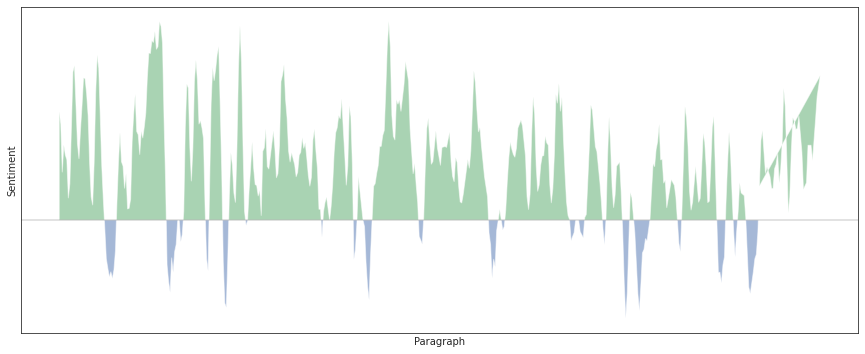

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 6]

blue = (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
green = (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)

sns.set_style("white")
plt.xlabel('Paragraph')
plt.ylabel('Sentiment')
plt.xticks([])
plt.yticks([])

plt.fill_between(df.paragraph_num, 0, df.smooth_compound, alpha=0.5, where=df.smooth_compound >= 0, facecolor=green, interpolate=True)
plt.fill_between(df.paragraph_num, 0, df.smooth_compound, alpha=0.5, where=df.smooth_compound < 0, facecolor=blue, interpolate=True)

plt.axhline(linewidth=1.5, c='gray', alpha=0.3)

with open('Fellowship.svg','wb') as svg_out:
    plt.savefig(svg_out, format="svg")

plt.show()

In [20]:
df['text'] = df_text_input[0]

In [21]:
df

,neg,neu,pos,compound,paragraph_num,smooth_compound,text
0,0.000,1.000,0.000,0.0000,1,NaN,Evening everyone.
1,0.000,0.789,0.211,0.4588,2,NaN,The federal reserve took a number of actions t...
2,0.136,0.568,0.295,0.4215,3,0.283156,And promote the flow credit as we weather disr...
3,0.000,0.833,0.167,0.4215,4,0.251278,Virus is having a profound effect on people ac...
4,0.147,0.853,0.000,-0.4767,5,0.125733,I'll be half of my colleagues at the federal r...
...,...,...,...,...,...,...,...
501,0.000,0.722,0.278,0.4019,502,0.323078,As is appropriate to you know to support.
502,0.000,1.000,0.000,0.0000,503,0.350489,Borrowing and lending in the economy.
503,0.000,0.675,0.325,0.6486,504,0.377900,And an enhanced to support the availability of...
504,0.000,0.405,0.595,0.5267,505,NaN,Okay thank you very much.


In [24]:
import plotly.graph_objects as go
import numpy as np

mask = df['smooth_compound'] >= 0
df['mean_mask'] = df['smooth_compound'].mean()
df['PnL_above'] = np.where(mask, df['smooth_compound'], 0)
df['PnL_below'] = np.where(mask, 0, df['smooth_compound'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['smooth_compound'], fill='tozeroy',
                    name='Sentiment'))
fig.add_trace(go.Scatter(x=df.index, y=df['mean_mask'],
                    name='Mean Sentiment'))

fig.update_layout(title='Sentiment Of '+filename,
                   yaxis_title='Sentiment',
                   xaxis_title='Paragraph')

In [25]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np


df["Color"] = np.where(df['smooth_compound']<0, 'red', 'green')
# Plot

fig = go.Figure()
fig.add_trace(
    go.Bar(name='text',
           x=df.index,
           y=df['smooth_compound'],
           marker_color=df['Color']))
fig.add_trace(go.Scatter(x=df.index, y=df['mean_mask'],
                    name='Mean Sentiment'))
fig.update_layout(title='Sentiment Of '+filename,
                   yaxis_title='Sentiment',
                   xaxis_title='Paragraph')
fig.show()